<a href="https://colab.research.google.com/github/izzyolejnik/Machine-Learning/blob/master/HW2/HW2PT2_fixed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Extension of Notebook for solving linear regression using the batch/mini-batch/stochastic gradient descent


## Imports

# Linear regression using mini-batch gradient descent
A few training examples are selected to compute the gradient.

Text(0.5, 0, 'y')

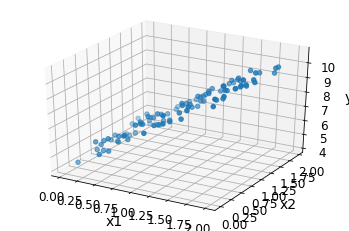

In [0]:
import numpy as np
%matplotlib inline
from mpl_toolkits import mplot3d
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# generate m random pairs (x, y)
m = 100
x1 = 2 * np.random.rand(m, 1)
x2 = 2 * np.random.rand(m, 1)
y = 4 + 3 * x1 + np.random.rand(m, 1)

# Show data points 
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x1, x2, y)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

In [0]:
# number of epochs
epochs = 20
# learning rate
lr = 0.01

In [0]:
# training set
trainx1 = x1[:80]
trainx2 = x2[:80]
trainy  =  y[:80]

# test set
testx1 = x1[80:]
testx2 = x2[80:]
testy  =  y[80:]

# weights
np.random.seed(42)
init_weight = np.random.randn(3,1)
x_b = np.column_stack([np.ones((80, 1)), trainx1, trainx2])
weights = init_weight
m = 80

In [0]:
def mini(x, y, epochs, m, lr, weights):
  batch = 4
  weight_path = []
  for epoch in range(epochs):
    indices = np.random.permutation(m)
    x_shuff = x[indices]
    y_shuff = y[indices]
    for i in range(0,m,batch):
      x_i = x_shuff[i:i+batch]
      y_i = y_shuff[i:i+batch]
      gradient = 1 / batch * x_i.T.dot(x_i.dot(weights) - y_i)
      weights = weights - lr * gradient
      weight_path.append(weights)
  return weight_path

In [0]:
weight_path_train = mini(x_b, trainy, 20, m, lr, weights)

In [0]:
weight_path_train[-1]

array([[3.08877355],
       [2.97484997],
       [1.25736005]])

In [0]:
weights = weight_path[-1]
weights

array([[3.3112013 ],
       [2.91201119],
       [1.17962236]])

In [0]:
new_weights = np.zeros(2)
new_weights[0] = weights[1]
new_weights[1] = weights[2]

In [0]:
new_weights

array([2.91201119, 1.17962236])

In [0]:
bias = weights[0][0]

In [0]:
bias

3.3112012979942347

In [0]:
print(len(x_b))

80


In [0]:
new_x = np.zeros(2)
trainx = []
for i in range(len(x_b)):
  new_x[0] = x_b[i][1]
  new_x[1] = x_b[i][2]
  trainx.append([new_x[0],new_x[1]])
trainx = np.asarray(trainx)
trainx.shape

(80, 2)

In [0]:
pred_ys = new_weights[0] * trainx + bias
pred_ys = pred_ys + new_weights[1] * trainx

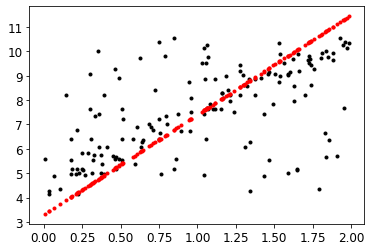

In [0]:
plt.plot(trainx, trainy, "k.")
plt.plot(trainx, pred_ys, "r.") # predicted values
plt.show()

In [0]:
x_t = np.column_stack([np.ones((20, 1)), testx1, testx2])
m = 20
weight_path_test = mini(x_t, testy, 20, m, lr, weights)
weights = weight_path_test[-1]

In [0]:
test_weights = np.zeros(2)
test_weights[0] = weights[1]
test_weights[1] = weights[2]
bias = weights[0][0]

In [0]:
new_x = np.zeros(2)
testx = []
for i in range(len(x_t)):
  new_x[0] = x_t[i][1]
  new_x[1] = x_t[i][2]
  testx.append([new_x[0],new_x[1]])
testx = np.asarray(testx)
testx.shape

(20, 2)

In [0]:
pred_ys = new_weights[0] * testx + bias
pred_ys = pred_ys + new_weights[1] * testx

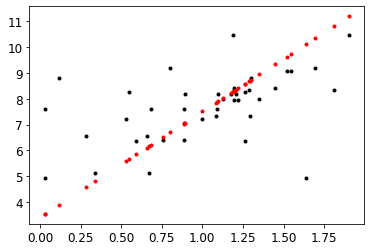

In [0]:
plt.plot(testx, testy, "k.")
plt.plot(testx, pred_ys, "r.") # predicted values
plt.show()

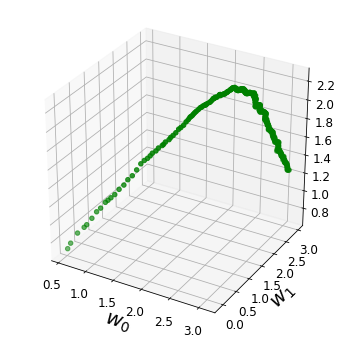

In [0]:
weight_path_train = np.array(weight_path_train)
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')
ax.scatter(weight_path_train[:, 0], 
           weight_path_train[:, 1], 
           weight_path_train[:, 2],
           color ="green")
plt.xlabel(r"$w_0$", fontsize=20)
plt.ylabel(r"$w_1$", fontsize=20, rotation=0)
plt.show()

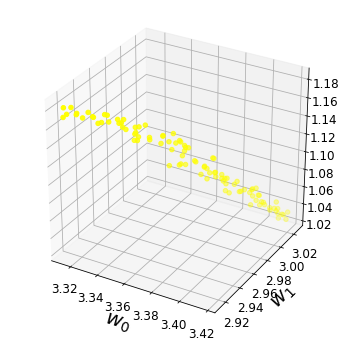

In [0]:
fig1 = plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')
weight_path_test = np.array(weight_path_test)
ax.scatter(weight_path_test[:, 0], 
           weight_path_test[:, 1], 
           weight_path_test[:, 2],
           color ="yellow")
plt.xlabel(r"$w_0$", fontsize=20)
plt.ylabel(r"$w_1$", fontsize=20, rotation=0)
plt.show()